# EDA Patient Data analysis

In [63]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load the dataset
data = pd.read_csv('diabetic_dataset.csv')  # Replace with your file path

# Display the first few rows
print(data.head())

# Display basic info about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


           BMI BloodPresure FastingBloodSugar  Sex    Age HistoryofAlcohol  \
0   overweight       stage1               high   m  young               no   
1  underweight    prestage            impaired   f  young              yes   
2  underweight       stage2           impaired   m  adult               no   
3  underweight       normal           impaired   f  young               no   
4   overweight       normal               high   f    old               no   

  HistoryofSmoking Pedigree KidneyDisease Polydipsia Polyuria Polyphagia  \
0               no      yes            no         no      yes         no   
1               no      yes            no         no      yes        yes   
2               no       no            no        yes       no        yes   
3               no      yes           yes         no      yes        yes   
4               no       no            no         no      yes         no   

  PregnantTime VisualComplaints  PhysicalActivity             Class  
0   

In [36]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BMI                 6084 non-null   object
 1   BloodPresure        6083 non-null   object
 2   FastingBloodSugar   6084 non-null   object
 3   Sex                 6082 non-null   object
 4   Age                 6082 non-null   object
 5   HistoryofAlcohol    6074 non-null   object
 6   HistoryofSmoking    6076 non-null   object
 7   Pedigree            6077 non-null   object
 8   KidneyDisease       6084 non-null   object
 9   Polydipsia          6080 non-null   object
 10  Polyuria            6077 non-null   object
 11  Polyphagia          6080 non-null   object
 12  PregnantTime        6082 non-null   object
 13  VisualComplaints    6083 non-null   object
 14   PhysicalActivity   6084 non-null   object
 15  Class               6085 non-null   object
dtypes: object(16)
memory usa

In [64]:
print(data.describe())

          BMI BloodPresure FastingBloodSugar    Sex    Age HistoryofAlcohol  \
count    6084         6083               6084  6082   6082             6074   
unique      4            4                  3     2      4                2   
top     obese       stage2               high     m  adult              yes   
freq     3513         4017               3916  3806   3901             3057   

       HistoryofSmoking Pedigree KidneyDisease Polydipsia Polyuria Polyphagia  \
count              6076     6077          6084       6080     6077       6080   
unique                2        2             2          2        2          2   
top                  no      yes           yes         no       no         no   
freq               3203     4369          4008       3481     3320       3578   

       PregnantTime VisualComplaints  PhysicalActivity             Class  
count          6082             6083              6084              6085  
unique            2                2            

          BMI BloodPresure FastingBloodSugar    Sex    Age HistoryofAlcohol  \
count    6084         6083               6084  6082   6082             6074   
unique      4            4                  3     2      4                2   
top     obese       stage2               high     m  adult              yes   
freq     3513         4017               3916  3806   3901             3057   

       HistoryofSmoking Pedigree KidneyDisease Polydipsia Polyuria Polyphagia  \
count              6076     6077          6084       6080     6077       6080   
unique                2        2             2          2        2          2   
top                  no      yes           yes         no       no         no   
freq               3203     4369          4008       3481     3320       3578   

       PregnantTime VisualComplaints  PhysicalActivity             Class  
count          6082             6083              6084              6085  
unique            2                2            

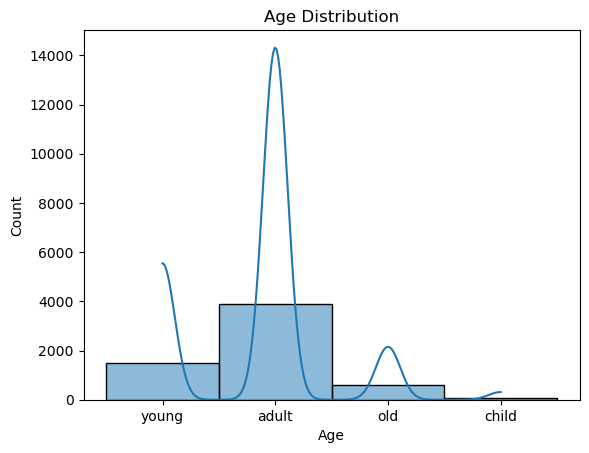

In [65]:
#univariate EDA analysis
print(data.describe())

# Visualize distributions of a few variables
sns.histplot(data['Age'], bins=20, kde=True)  # Example variable 'Age'
plt.title('Age Distribution')
plt.show()


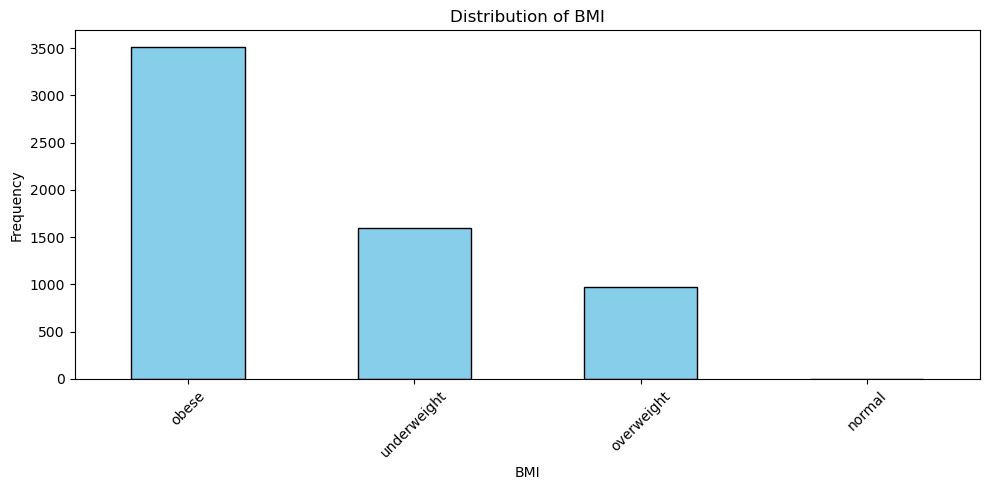

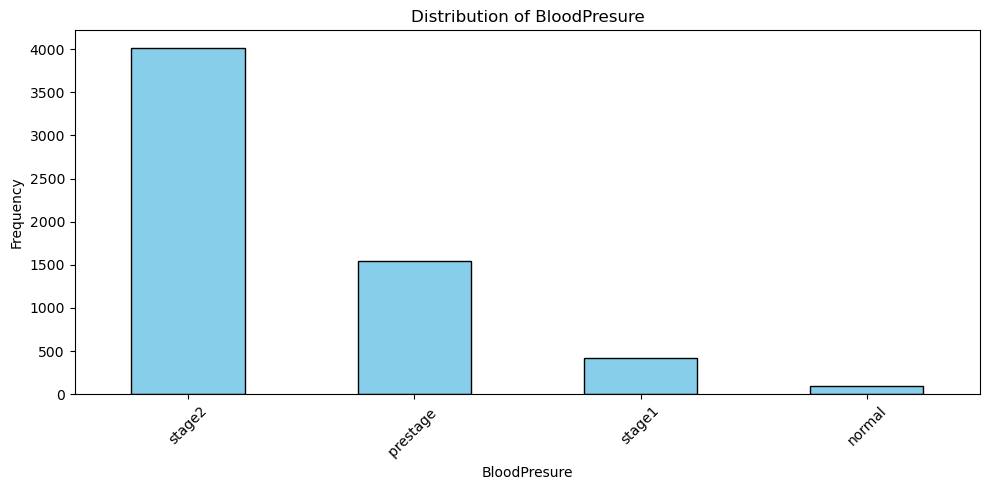

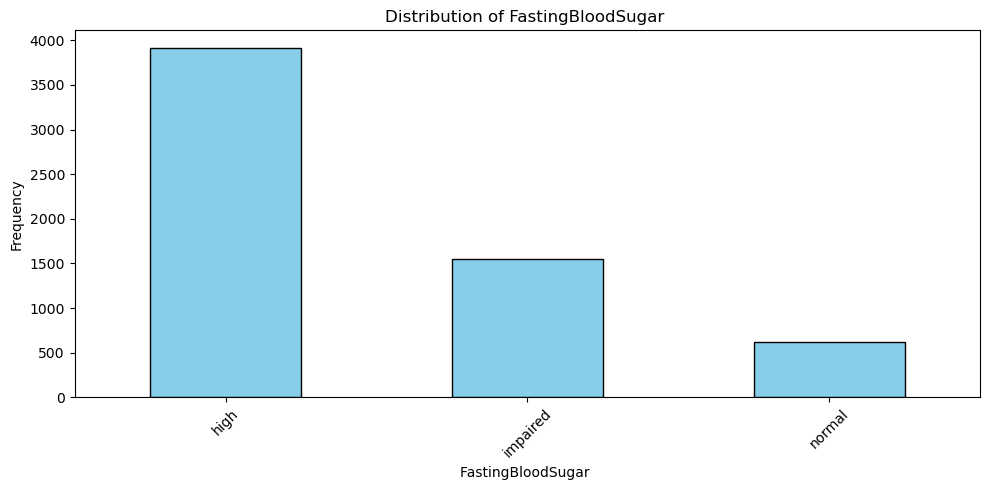

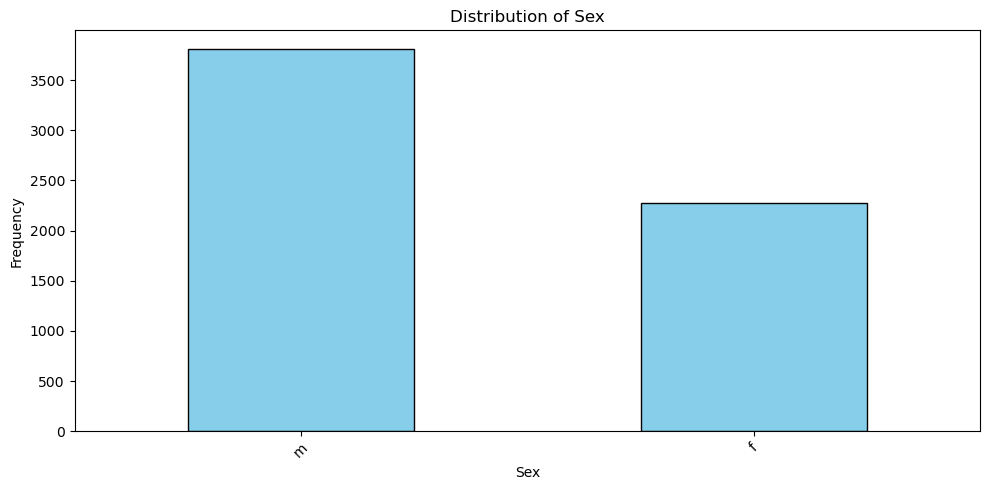

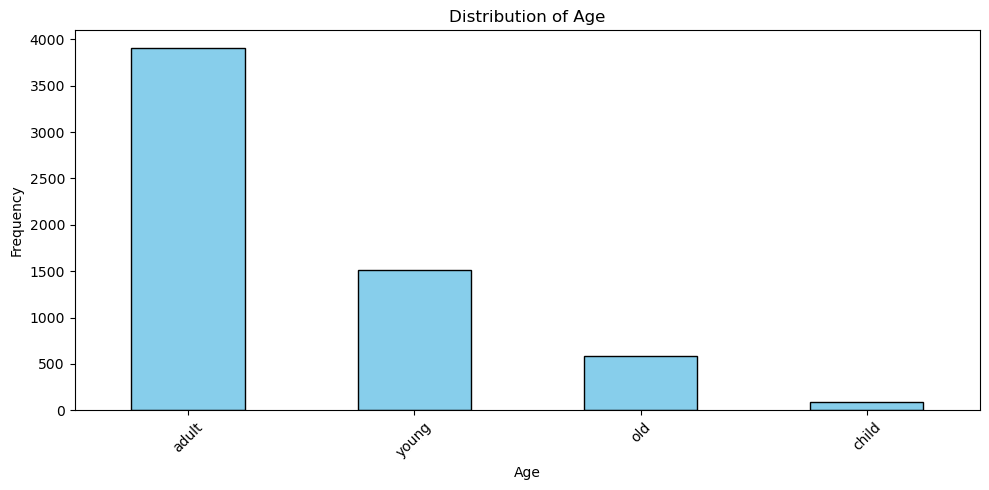

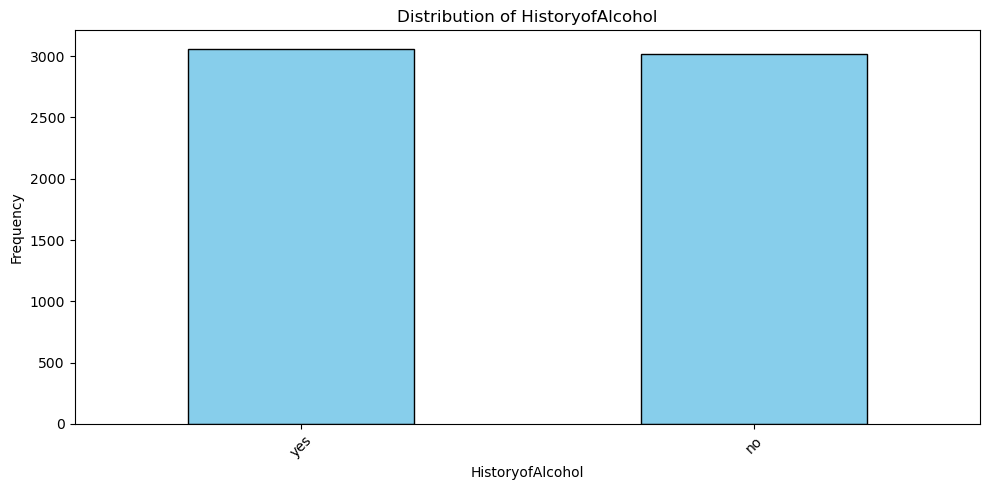

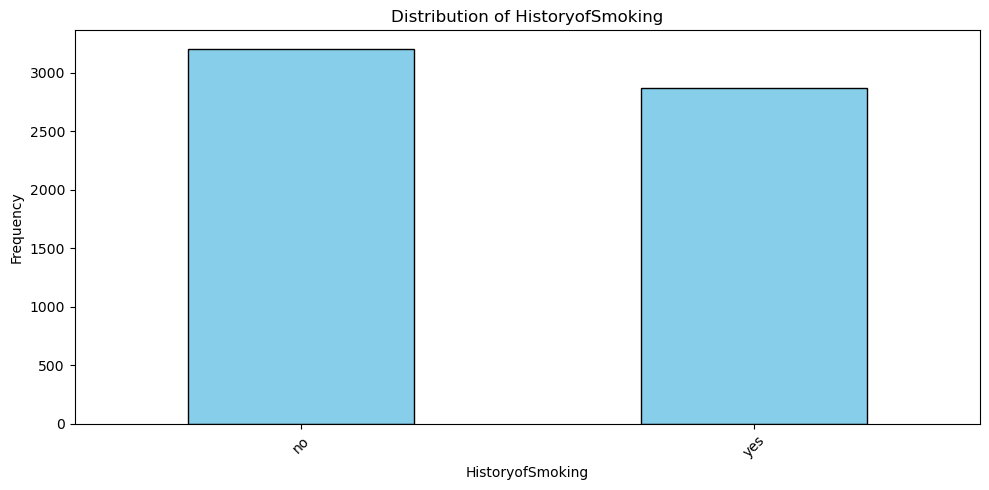

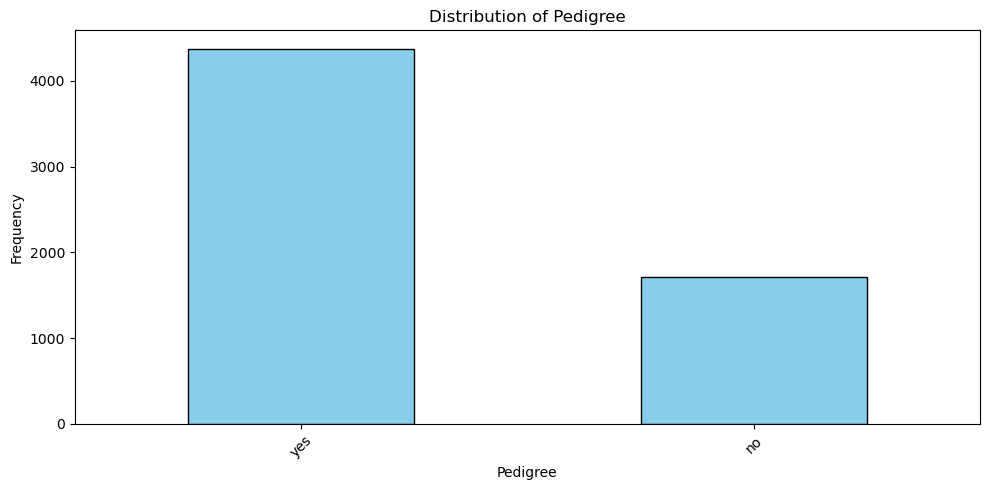

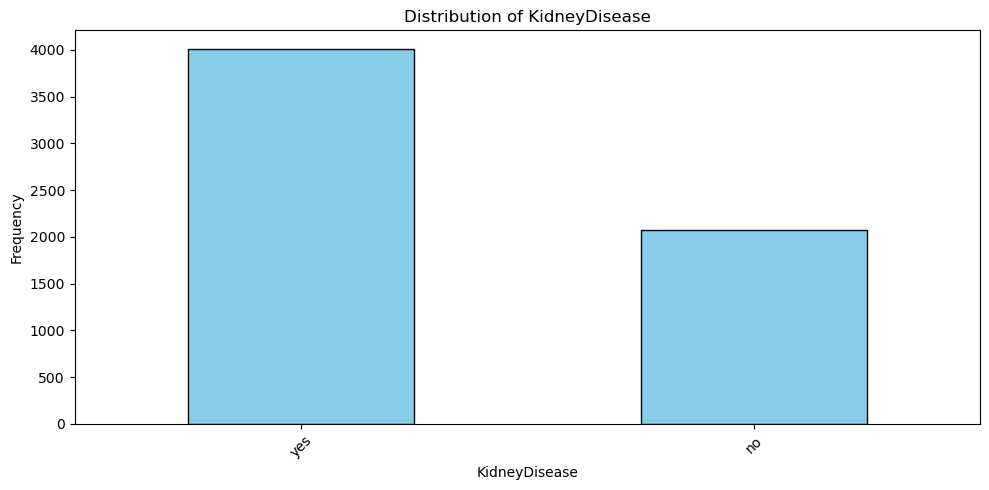

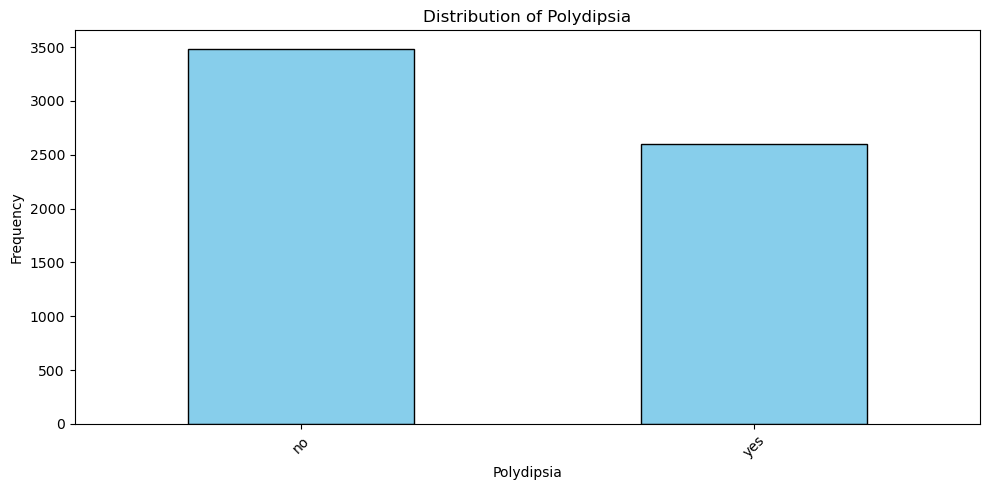

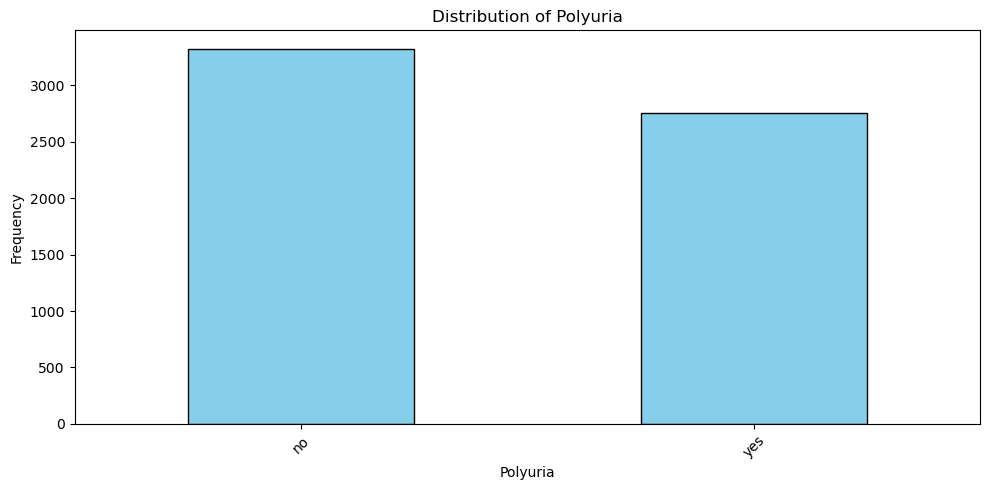

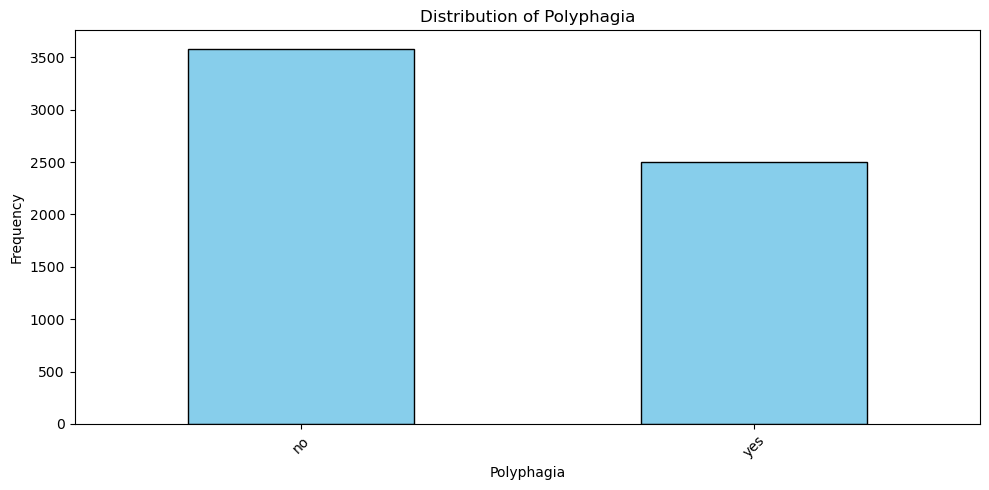

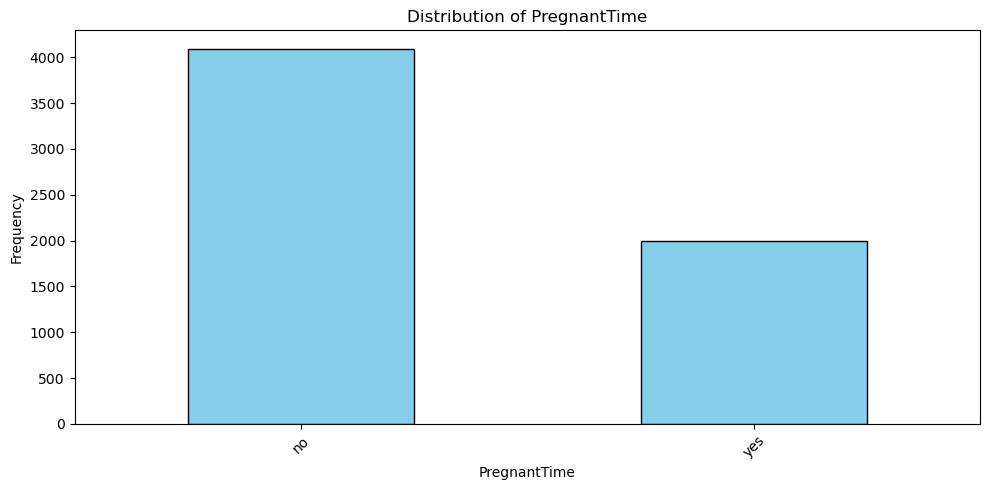

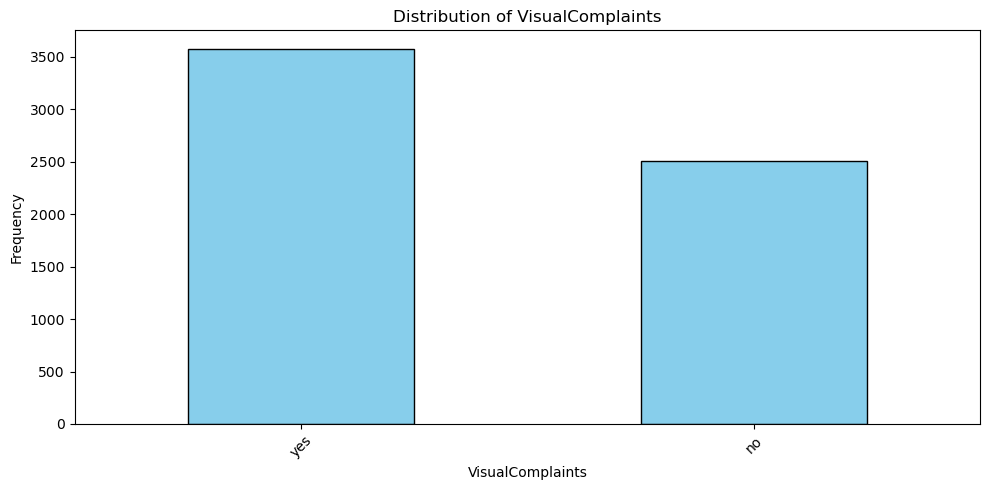

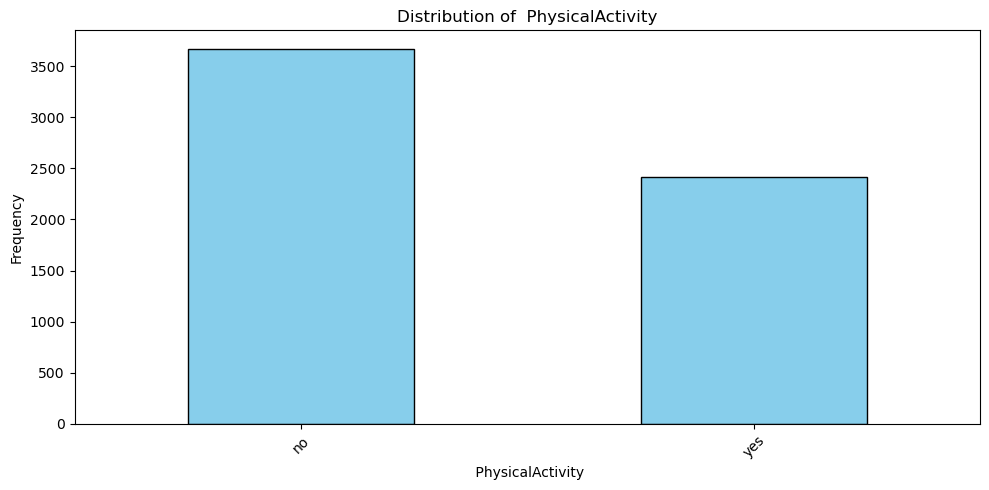

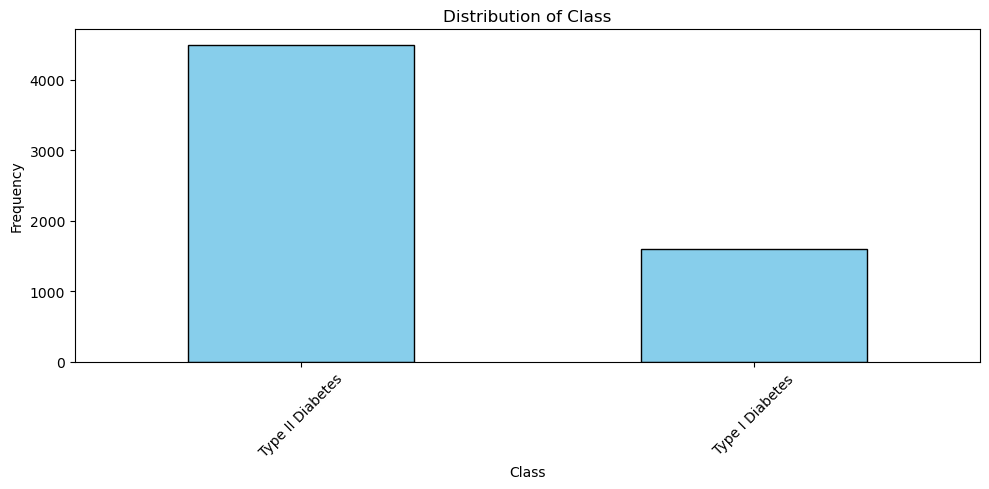

In [66]:
Visualizing Non-Numeric Rows or Columns
data = pd.read_csv('diabetic_dataset.csv')  # Replace with your file name

# Loop through each non-numeric column and plot a bar chart
non_numeric_columns = data.select_dtypes(include=['object']).columns

for col in non_numeric_columns:
    plt.figure(figsize=(10, 5))
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

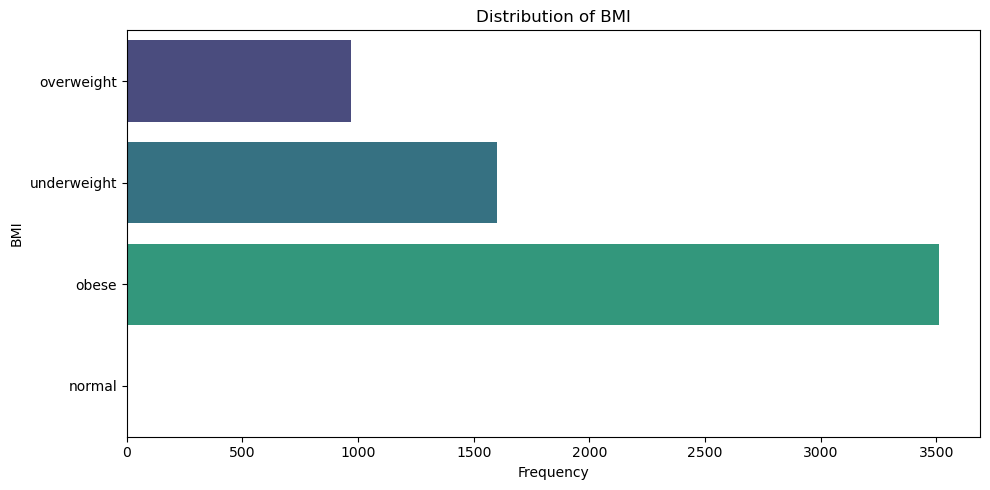

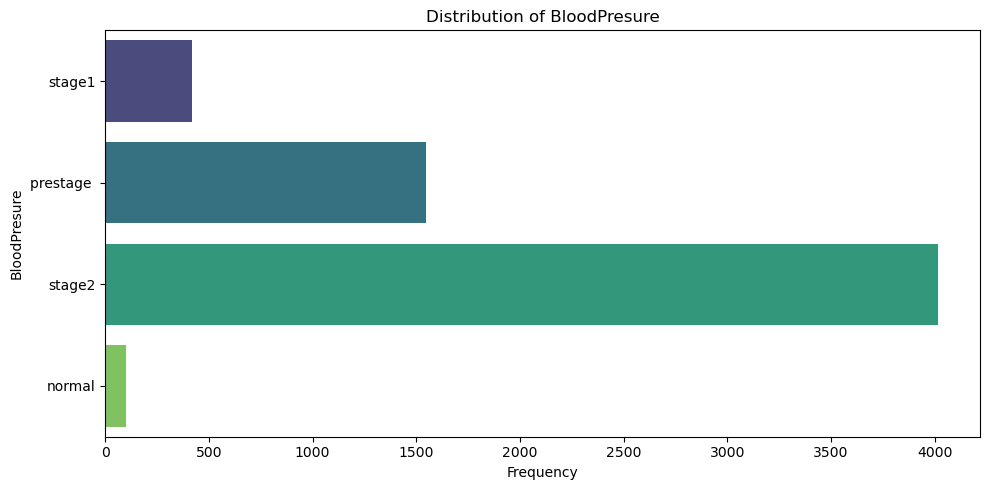

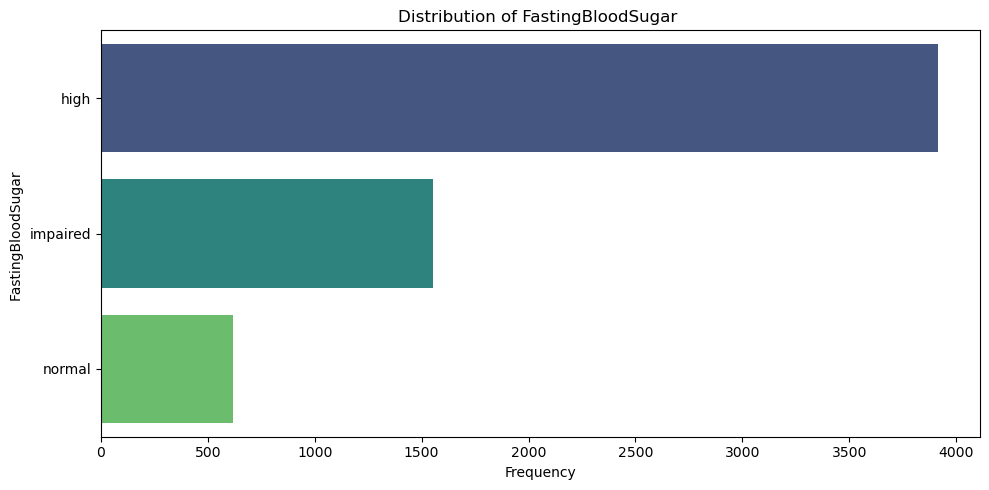

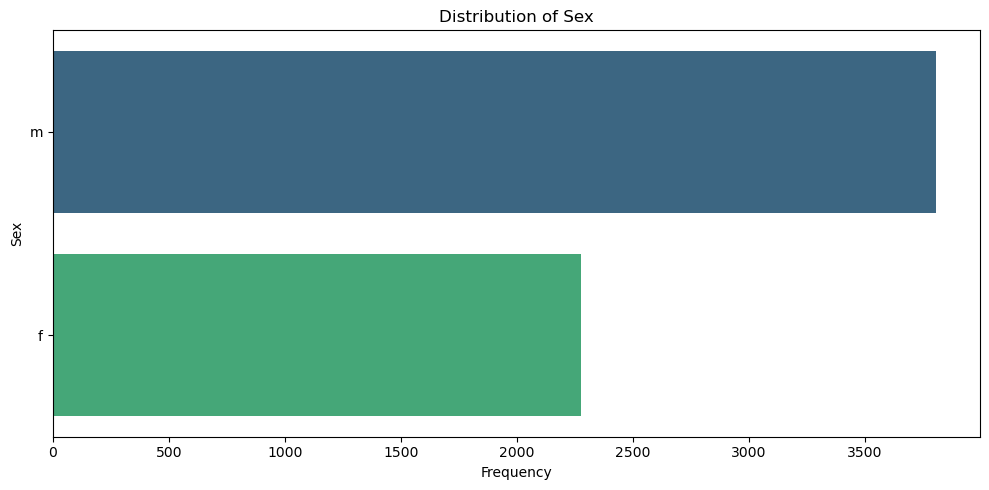

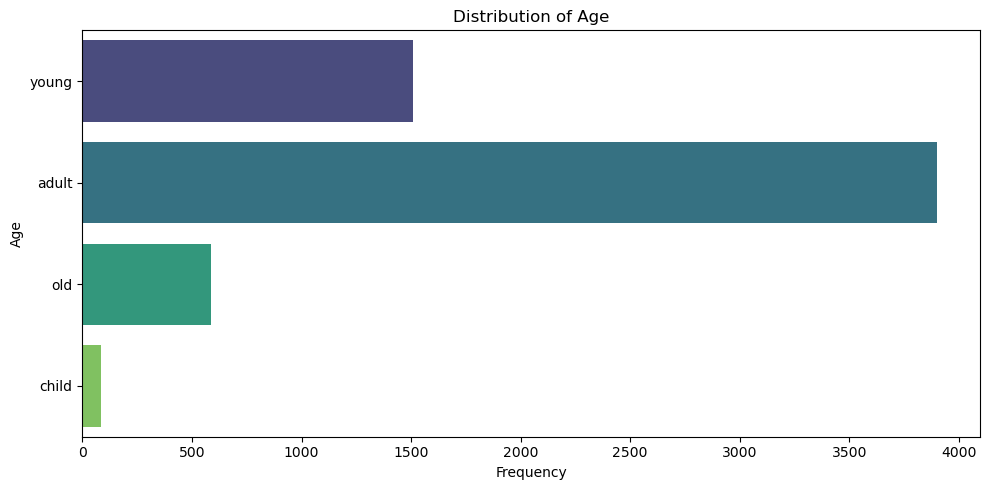

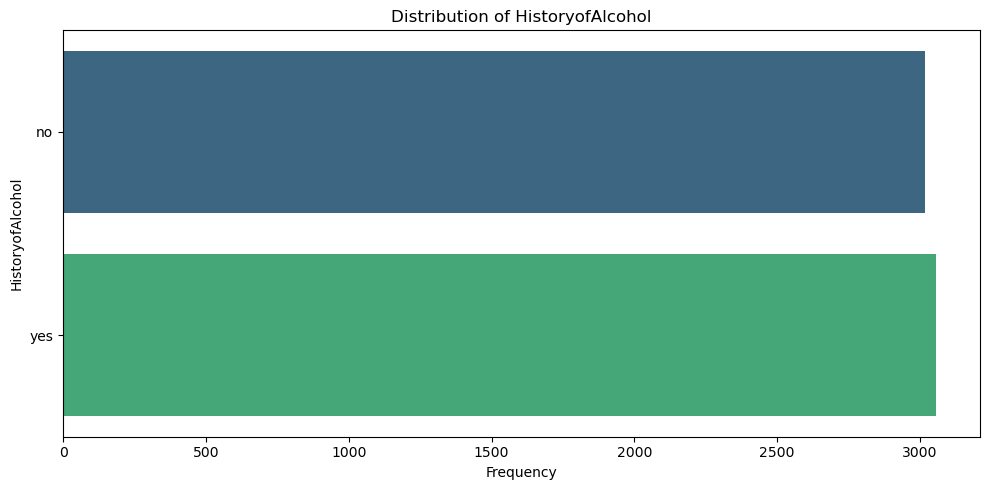

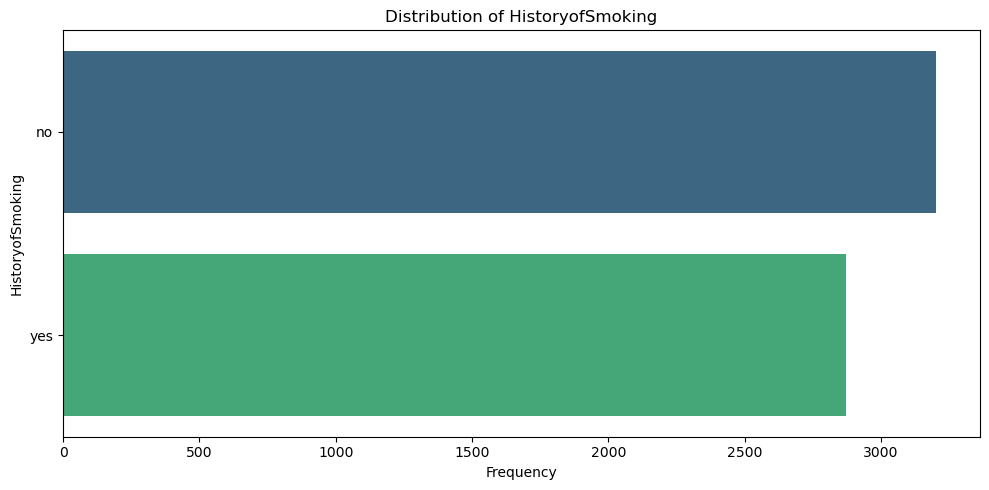

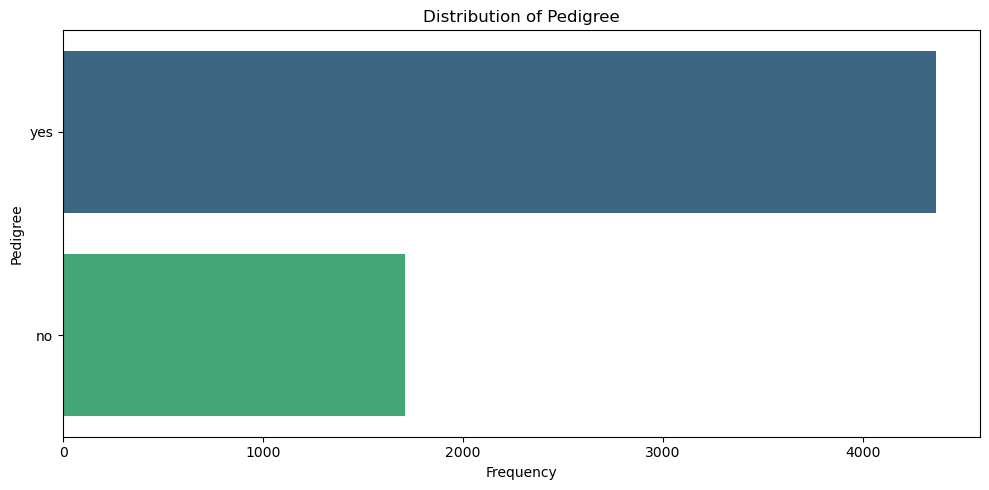

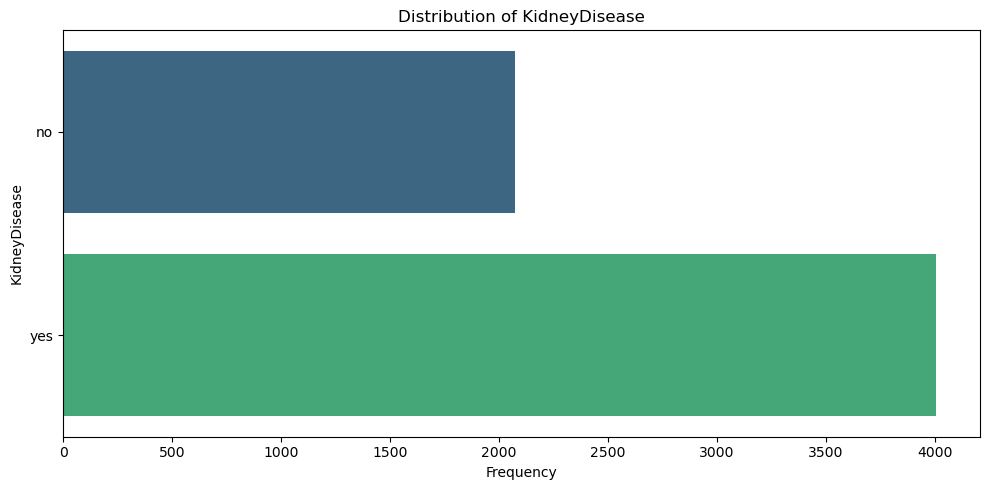

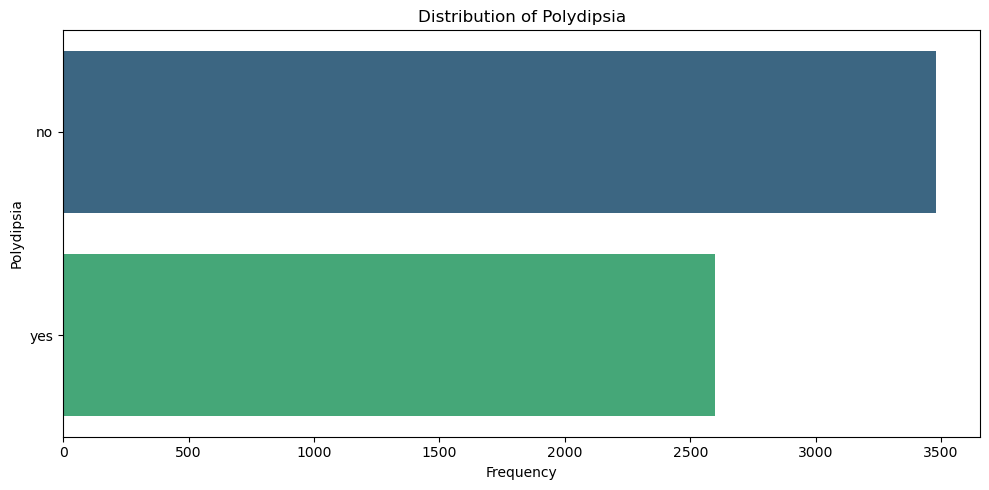

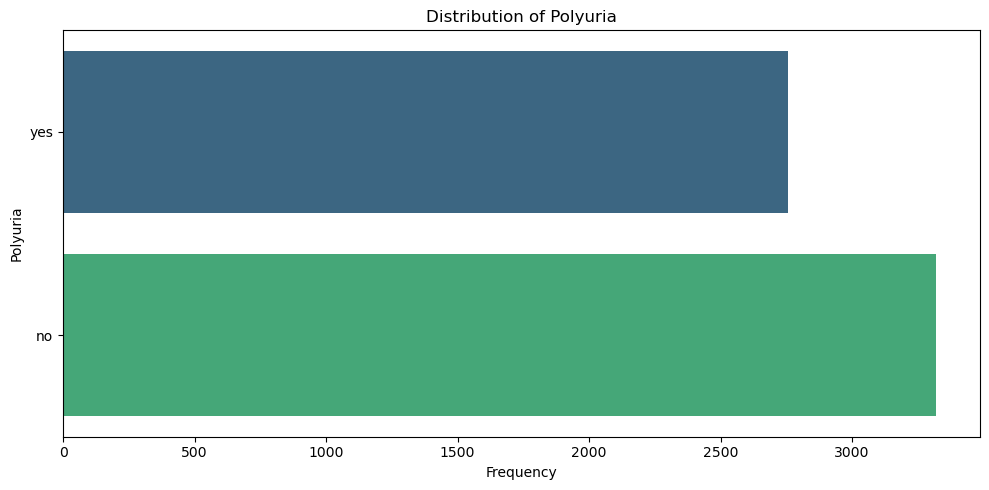

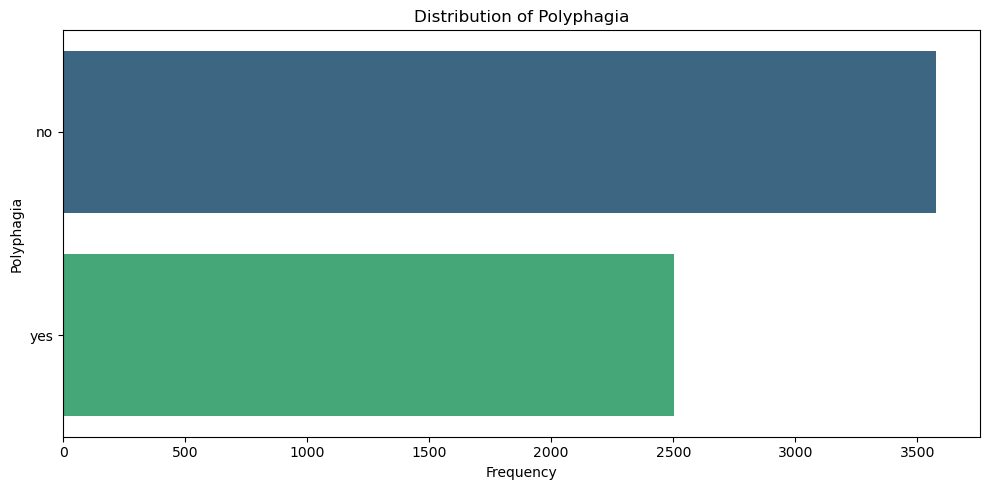

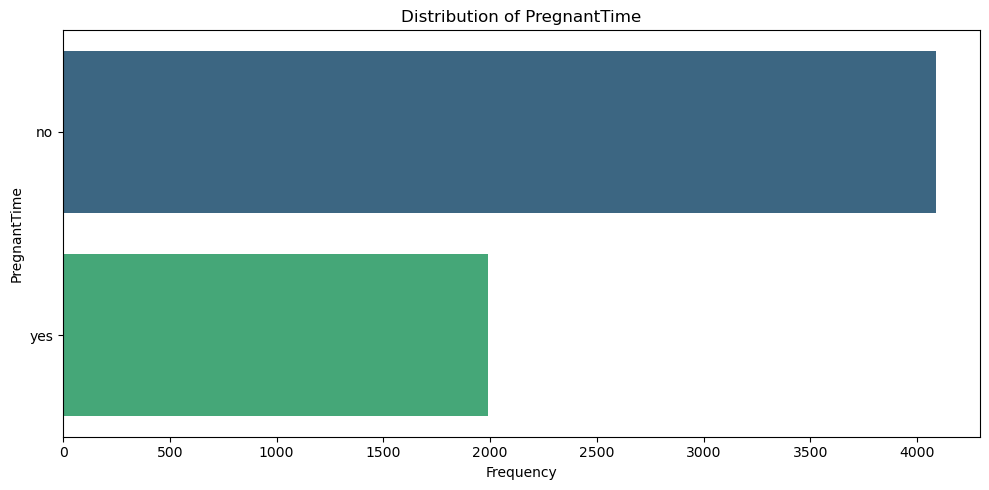

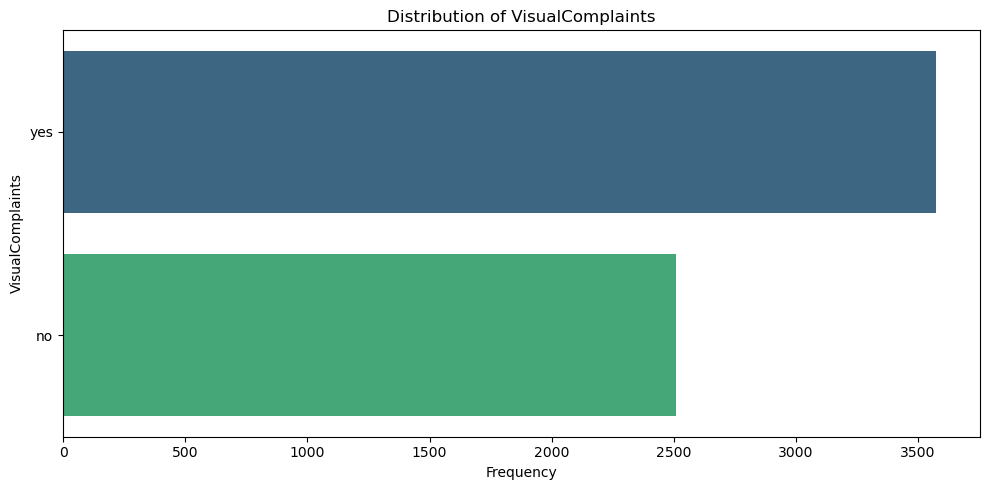

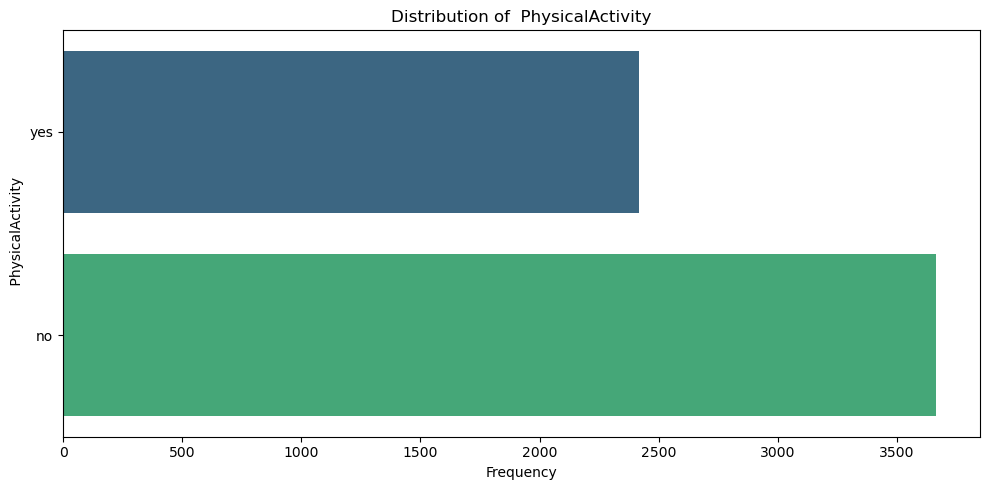

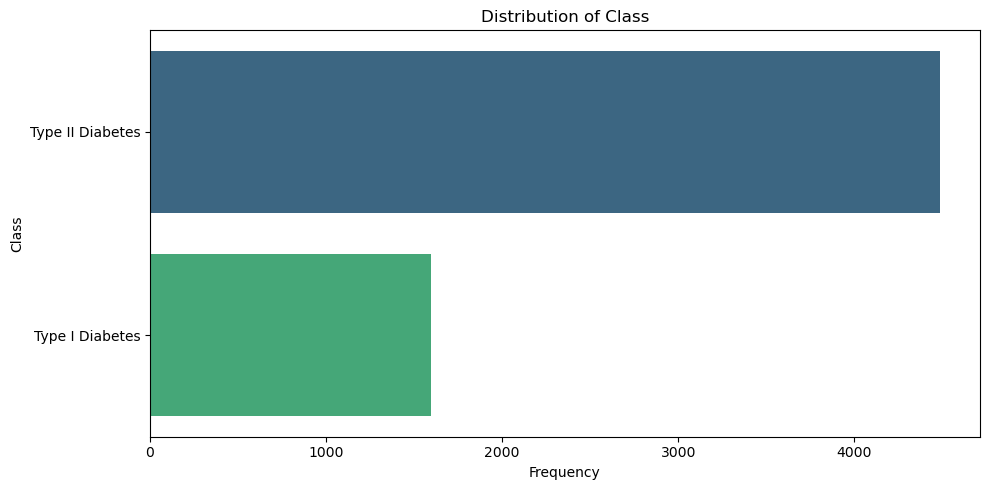

In [70]:
# Loop through each non-numeric column and create a count plot
for col in non_numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[col], palette='viridis')  # Use 'y=' to display horizontally
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# One-hot encode non-numeric columns
data = pd.get_dummies(data, drop_first=True)
print(data.head())



   BMI_obese  BMI_overweight  BMI_underweight  BloodPresure_prestage   \
0          0               1                0                       0   
1          0               0                1                       1   
2          0               0                1                       0   
3          0               0                1                       0   
4          0               1                0                       0   

   BloodPresure_stage1  BloodPresure_stage2  FastingBloodSugar _impaired  \
0                    1                    0                            0   
1                    0                    0                            1   
2                    0                    1                            1   
3                    0                    0                            1   
4                    0                    0                            0   

   FastingBloodSugar _normal  Sex_m  Age_child  ...  HistoryofSmoking_yes  \
0                          

In [78]:
# Fill missing values with a placeholder or the most frequent value
data.fillna('Unknown', inplace=True)  # For categorical data


In [80]:


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_tfidf = vectorizer.fit_transform(X)

print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")  # Check the size of the feature matrix



Shape of TF-IDF matrix: (4, 8)


In [88]:
data = pd.read_csv('diabetic_dataset.csv')  # Replace with your file path

# Display the first few rows
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

           BMI BloodPresure FastingBloodSugar  Sex    Age HistoryofAlcohol  \
0   overweight       stage1               high   m  young               no   
1  underweight    prestage            impaired   f  young              yes   
2  underweight       stage2           impaired   m  adult               no   
3  underweight       normal           impaired   f  young               no   
4   overweight       normal               high   f    old               no   

  HistoryofSmoking Pedigree KidneyDisease Polydipsia Polyuria Polyphagia  \
0               no      yes            no         no      yes         no   
1               no      yes            no         no      yes        yes   
2               no       no            no        yes       no        yes   
3               no      yes           yes         no      yes        yes   
4               no       no            no         no      yes         no   

  PregnantTime VisualComplaints  PhysicalActivity             Class  
0   

In [89]:
# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [91]:
# Example: Predict for new text samples
new_texts = ['This is an amazing service', 'Terrible experience with the product']

# Transform the new text using the fitted TF-IDF vectorizer
new_texts_tfidf = vectorizer.transform(new_texts)

# Predict the outcomes
predictions = model.predict(new_texts_tfidf)
print("\nPredictions:", predictions)



Predictions: [1 1]


In [93]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
